# The Analysis of Tour and Travel Compnay.
A tour & travels company wants to predict whether a customer will churn or not. Based on a few customer characteristics 
like their age, frequent flyer status, annual income class, services opted, account snick to social media, booked hotel or not,
Target.

The analysis and forecasting are based on the customer churn's impact on yearly income, hotel reservations, and
whether or not they were made in order to assist the business in developing predictive models, saving money, and
performing fascinating EDAs.

# Research Questions
How Hotel Booking and Annual Income effect customer churn?
How can we prevent customer churn?

# Importing Libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

In [2]:
df = pd.read_csv("C:/Users/prash/Downloads/archive (3)/Customertravel.csv")

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# Statistical Summary

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [15]:
df.describe(include= object).T

,count,unique,top,freq
FrequentFlyer,954,3,No,608
AnnualIncomeClass,954,3,Middle Income,409
AccountSyncedToSocialMedia,954,2,No,594
BookedHotelOrNot,954,2,No,576


In [11]:
df.isnull().values.any()                  # make sure you use correct brakets 
value =len(df[df.duplicated()])
print(value)

507


In [26]:
for col in df.describe(include = object).columns:
        print(col)
        print(df[col].unique())
        print('-'*40)

FrequentFlyer
['No' 'Yes' 'No Record']
----------------------------------------
AnnualIncomeClass
['Middle Income' 'Low Income' 'High Income']
----------------------------------------
AccountSyncedToSocialMedia
['No' 'Yes']
----------------------------------------
BookedHotelOrNot
['Yes' 'No']
----------------------------------------


In [27]:
df.corr()

C:\Users\prash\AppData\Local\Temp\ipykernel_11476\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,ServicesOpted,Target
Age,1.000000,-0.012422,-0.131534
ServicesOpted,-0.012422,1.000000,0.038646
Target,-0.131534,0.038646,1.000000


# Data Visualization 
Here first creat a varible , store columns to convert them as a vaalue using pd.factorize function 

In [38]:
feature = ['FrequentFlyer','AnnualIncomeClass','ServicesOpted','AccountSyncedToSocialMedia','BookedHotelOrNot']
for f in feature: 
        df[f] = pd.factorize(df[f])[0]
print(df.head().T)

                             0   1   2   3   4
Age                         34  34  37  30  30
FrequentFlyer                0   1   0   0   0
AnnualIncomeClass            0   1   0   0   1
ServicesOpted                0   1   2   3   4
AccountSyncedToSocialMedia   0   1   1   0   0
BookedHotelOrNot             0   1   1   1   1
Target                       0   1   0   0   0


1    0.603774
0    0.396226
Name: BookedHotelOrNot, dtype: float64


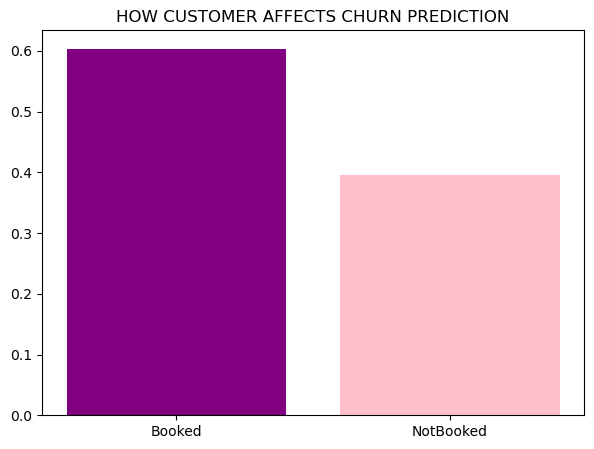

In [61]:
churn_prediction = df['BookedHotelOrNot'].value_counts(normalize =1 )
print(churn_prediction)


plt.figure(figsize=(7,5))
plt.bar(['Booked' , 'NotBooked'] , churn_prediction.values , color =['purple', 'pink'])
plt.title('HOW CUSTOMER AFFECTS CHURN PREDICTION')
plt.show()

# MONTHLY INCOME VISUALISATION

In [65]:
income = df.groupby('AnnualIncomeClass')
income = income.size()
print(income)

AnnualIncomeClass
0    409
1    386
2    159
dtype: int64


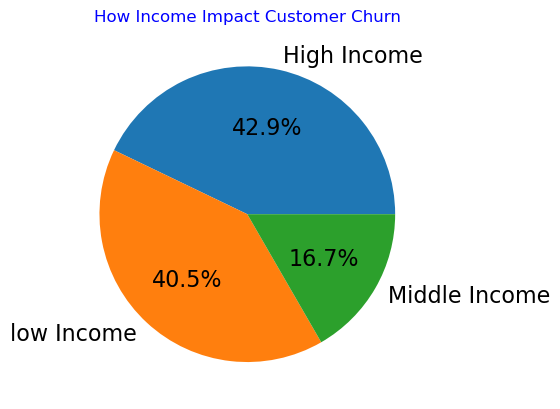

In [83]:
plt.pie(income.values, labels= ['High Income', 'low Income', 'Middle Income'] , autopct = '%1.1f%%' ,radius=1, 
        textprops= {"fontsize" : 16} )
plt.title('How Income Impact Customer Churn', c='b')
plt.show()

# Analytical Summary

In [ ]:
customers who booked hotel are of 60%  of the total population and they must be from 43% of high income group of peope. 
whereas those who have not made hotel reservations account for 39% of the population, which is a significant number.

We found that customers with the highest yearly income have the lowest proportion of customer churn, whereas those with
the lowest (40%) and middle (42%), have the highest percentage of churn.

# Insights

In [ ]:
The largest customer churn has been observed when a consumer has not made a hotel reservation. 
This may be due to a number of factors, including expensive hotel rates and longer waiting lists
for reservations, both of which have a substantial impact on why people don't book hotels. 
This may help us understand how to run the campaign in order to shorten the waiting list.

The highest customer churn have also seen in the situation where customer have low and middle income.
This may give us an idea of the needs of the customers, and you can utilise the insights to work on
how to lower your pricing without affecting your revenue, which you can then offer to your customers, 
which can prevent the customer churn.